/Users/Kiana/anaconda/envs/python27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


{-60.0: ([<matplotlib.lines.Line2D at 0x1126b91d0>,
  []),
 0.0: ([<matplotlib.lines.Line2D at 0x1126bf4d0>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x1126bfb10>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x11280b190>], []),
 180.0: ([<matplotlib.lines.Line2D at 0x11280b7d0>], []),
 240.0: ([<matplotlib.lines.Line2D at 0x11280be10>,
  [])}

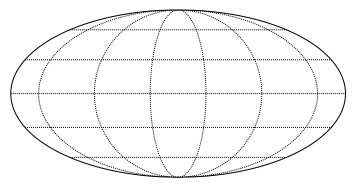

In [1]:
from scipy.io.idl import readsav
from netCDF4 import Dataset, num2date
from mpl_toolkits.basemap import Basemap
import numpy as np
import healpy as hp
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='moll',lon_0=90,resolution='c')
#m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))

In [49]:
filename = '/Users/Kiana/Desktop/projects/uwsummer/Combined_obs_Aug23_even_cubeYY.sav'

In [50]:
contents = readsav(filename, python_dict=True)
nside = int(contents['nside'])
pixels = contents['hpx_inds']

In [51]:
ra, dec = hp.pixelfunc.pix2ang(nside, pixels, nest=False, lonlat=True)
ra[np.where(ra>180)]-=360
print np.min(ra)
print np.max(ra)
print np.min(dec)
print np.max(dec)
#adjusts for if data overlaps the 'prime meridian' of Basemap

-13.3154296875
12.919921875
-37.0753349824
-15.5976435925


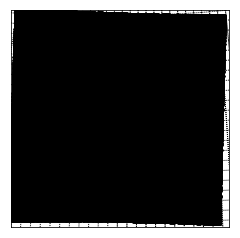

In [52]:
#data points are all black
m = Basemap(projection='hammer', llcrnrlon=-11,llcrnrlat=-15,urcrnrlon=13.5,urcrnrlat=-37, resolution = 'h', epsg=5520)
x, y = m(ra, dec)
m.drawparallels(np.arange(-90.,120.,1.))
m.drawmeridians(np.arange(0.,420.,1.))
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,3,marker='o',color='k')
plt.show()

In [53]:
contents.keys()

['n_avg',
 'nside',
 'frequencies',
 'model_cube',
 'hpx_inds',
 'variance_cube',
 'dirty_cube',
 'weights_cube',
 'res_cube',
 'beam_squared_cube',
 'obs_arr']

In [54]:
residual_data = contents['dirty_cube'] - contents['model_cube']
dirty_data = contents['dirty_cube']
model_data = contents['model_cube']

In [55]:
residual_data.shape

(192, 135413)

In [56]:
residual_maxval = np.mean(residual_data, axis=1)
dirty_maxval = np.mean(dirty_data, axis=1)
model_maxval = np.mean(model_data, axis=1)

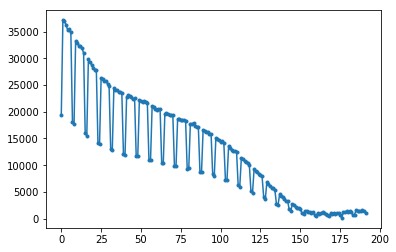

In [57]:
line = plt.plot(residual_maxval, marker='.')
plt.show()

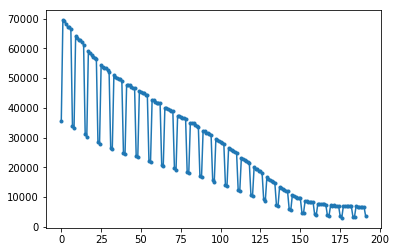

In [58]:
line2 = plt.plot(dirty_maxval, marker='.')
plt.show()

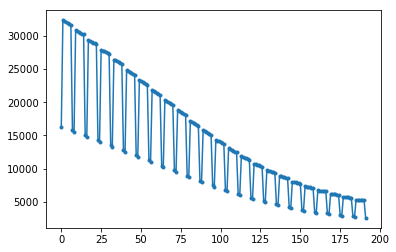

In [59]:
line3 = plt.plot(model_maxval, marker='.')
plt.show()

In [60]:
print model_maxval[0:10]

[ 16222.62402344  32343.68164062  32209.21679688  32082.03125     31943.8125
  31819.33398438  31688.03320312  15792.74804688  15466.87792969
  30840.85351562]


In [9]:
residual_data = residual_data[1,:]

In [10]:
dirty_data = contents['dirty_cube'][1,:]

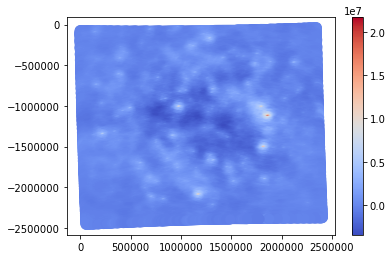

In [11]:
sc = plt.scatter(x, y, marker='.', s=150, linewidths=4, c=dirty_data, cmap=plt.cm.coolwarm)
plt.colorbar(sc)
plt.show()
#plot with bright sources

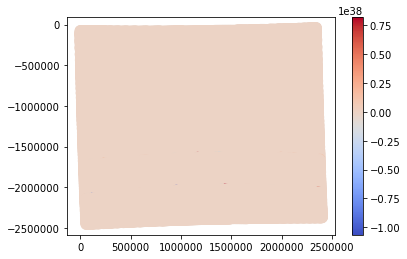

In [12]:
sc = plt.scatter(x, y, marker='.', s=150, linewidths=4, c=residual_data, cmap=plt.cm.coolwarm)
plt.colorbar(sc)
plt.show()
#plot of MW gas, with bright sources removed

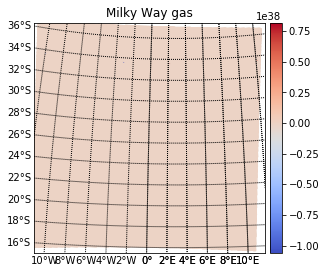

In [13]:
#plot of MW gas with coordinate projection
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(projection='hammer', llcrnrlon=-11,llcrnrlat=-15,urcrnrlon=13.5,urcrnrlat=-37, resolution = 'h', epsg=5520)
x, y = m(ra, dec)
#draw parallels and meridians
m.drawparallels(np.arange(-90.,120.,2.), labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,420.,2.), labels=[0,0,0,1])

m.scatter(x,y,3,marker='o', linewidths=.1, c=residual_data, cmap=plt.cm.coolwarm)
m.colorbar()
plt.title('Milky Way gas')

#plt.show()

plt.savefig('Combined_obs_Aug23_even_cubeXX.png')